In [2]:
print("hello world")

hello world


In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4070 Ti'

In [5]:
!nvidia-smi

Sat Aug 26 13:48:17 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   34C    P8               6W / 285W |      0MiB / 12282MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Part 1: Stable Diffusion Inference

In [1]:
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers

Cloning into 'diffusers'...


Processing c:\users\user\documents\data science\project\1_ootd_image_generator\diffusers
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for huggingface-hub>=0.13.2 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/e6/7c/96a44dabe8577f43ac34e34d0ac098ee42390a06fee4cbe8b5317ecf2520/regex-2023.8.8-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/diffusers/examples/text_to_image/requirements.txt'


In [4]:
!pip install -U -r ./diffusers/examples/text_to_image/requirements.txt

  Obtaining dependency information for accelerate>=0.16.0 from https://files.pythonhosted.org/packages/70/f9/c381bcdd0c3829d723aa14eec8e75c6c377b4ca61ec68b8093d9f35fc7a7/accelerate-0.21.0-py3-none-any.whl.metadata
  Obtaining dependency information for transformers>=4.25.1 from https://files.pythonhosted.org/packages/21/02/ae8e595f45b6c8edee07913892b3b41f5f5f273962ad98851dc6a564bbb9/transformers-4.31.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/116.9 kB ? eta -:--:--
     ------------------------------ -------- 92.2/116.9 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 116.9/116.9 kB 6.7 MB/s eta 0:00:00
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/66/f8/38298237d18d4b6a8ee5dfe390e97bed5adb8e01ec6f9680c0ddf3066728/datasets-2.14.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/53.1 kB ? eta -:--:--
     ---------------------------------------- 53.1/53.1 kB ? 

##### Stable Diffusion V1 Inference Testing

test out version 1.2 of the original model without any finetuning

In [6]:
from diffusers import StableDiffusionPipeline
import torch #Stable Diffusion V1
from PIL import Image

c:\Users\user\anaconda3\envs\ootd_generation\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

text_encoder\model.safetensors not found
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 50/50 [00:04<00:00, 10.11it/s]


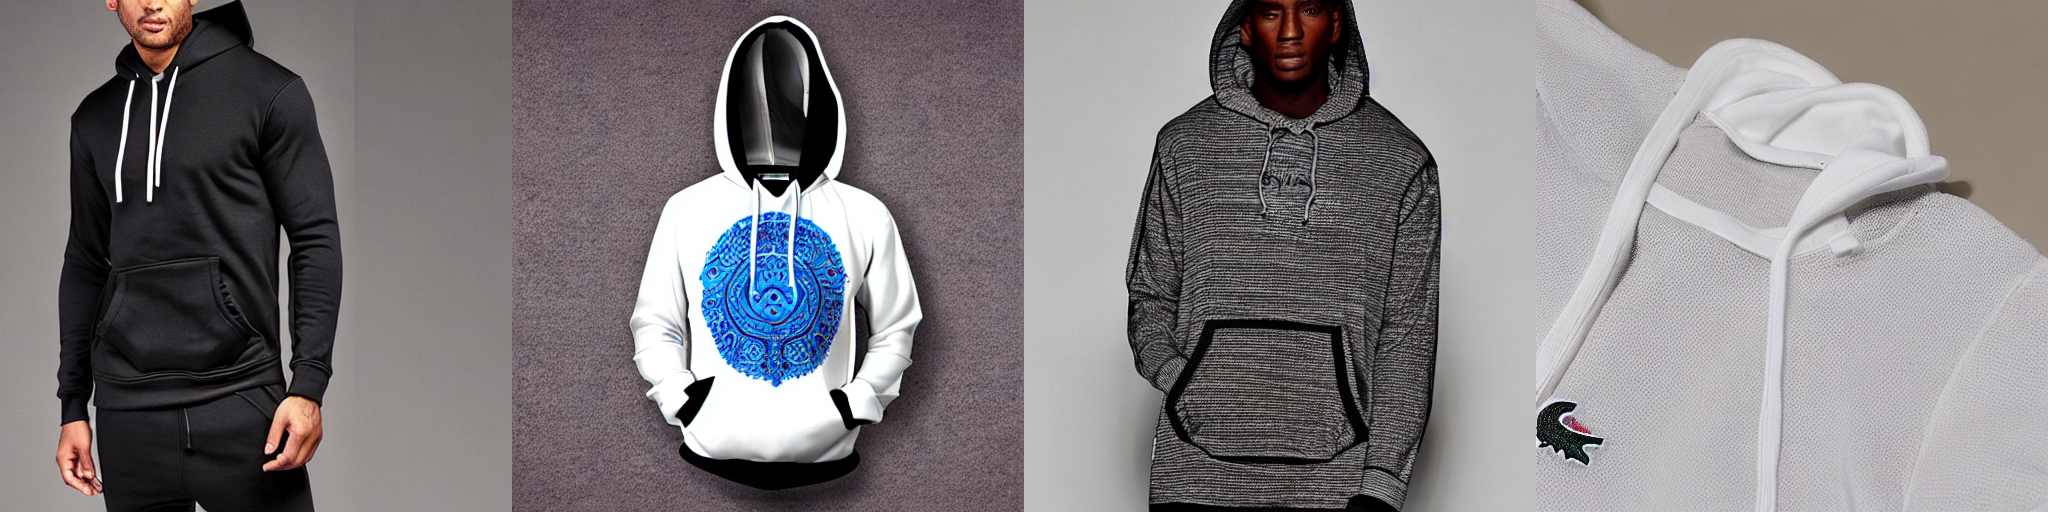

In [4]:
# Stable Diffusion V1
model_path = "CompVis/stable-diffusion-v1-2"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="black hoodie with a front half zipper by martin valen").images[0]
image1.save("./_output/stable-diffusion-v1-2/ProductSnapAI_panel_1.png")

image2 = pipe(prompt="white hoodie with a blue design by martin valen").images[0]
image2.save("./_output/stable-diffusion-v1-2/ProductSnapAI_panel_2.png")

image3 = pipe(prompt="stripped hoodie by martin valen").images[0]
image3.save("./_output/stable-diffusion-v1-2/ProductSnapAI_panel_3.png")

image4 = pipe(prompt="white hoodie by lacoste").images[0]
image4.save("./_output/stable-diffusion-v1-2/ProductSnapAI_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

#####  Stable Diffusion V2 Inference Testing

test out version 2.1 of the original model without any finetuning.

text_encoder\model.safetensors not found
Fetching 13 files:   8%|▊         | 1/13 [00:00<00:10,  1.20it/s]











Fetching 13 files:  23%|██▎       | 3/13 [00:01<00:05,  1.95it/s]



































































































































































































































































































































































































































































































Fetching 13 files:  38%|███▊      | 5/13 [00:31<01:04,  8.03s/it]













































































































































































































































































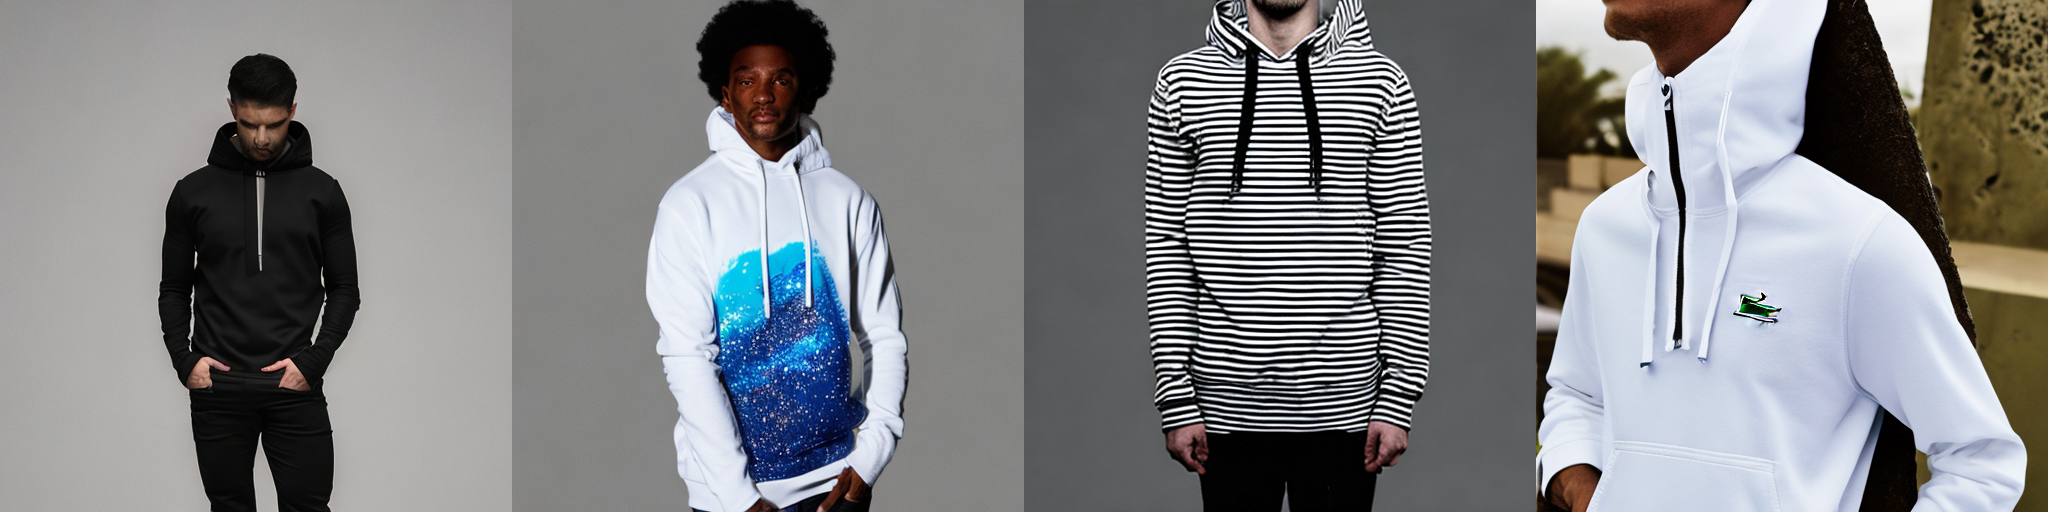

In [5]:
# Stable Diffusion V2
model_path = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="black hoodie with a front half zipper by martin valen").images[0]
image1.save("./_output/stable-diffusion-2-1-base/ProductSnapAI_panel_1.png")

image2 = pipe(prompt="white hoodie with a blue design by martin valen").images[0]
image2.save("./_output/stable-diffusion-2-1-base/ProductSnapAI_panel_2.png")

image3 = pipe(prompt="stripped hoodie by martin valen").images[0]
image3.save("./_output/stable-diffusion-2-1-base/ProductSnapAI_panel_3.png")

image4 = pipe(prompt="white hoodie by lacoste").images[0]
image4.save("./_output/stable-diffusion-2-1-base/ProductSnapAI_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid


### Part 2: Fine-tuning Stable Diffusion

In [7]:
!nvidia-smi

Sat Aug 26 13:48:58 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   34C    P8               5W / 285W |      0MiB / 12282MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--